# <center> 【Kaggle】Elo Merchant Category Recommendation    


# <center> 1. 赛题分析与训练集和测试集数据探索

## 一、分析赛题背景、数据获取

<center><img src="https://i.loli.net/2021/10/20/DplYIfdsh3JCbEO.png" alt="1" style="zoom:50%;" />

&emsp;&emsp;首先，我们可以在此处看到关于Elo Merchant Category Recommendation竞赛的基本说明：https://www.kaggle.com/competitions/elo-merchant-category-recommendation/overview 。并且在该页面，我们能够获取到与之相关的所有核心信息，当然，由于是完结赛事，相比组队/参与竞赛/提交代码等功能，我们更关注如何获取数据、赛题说明以及参与讨论、查看代码分享等功能，相关功能入口如下：

<center><img src="./img/1.png" alt="2" style="zoom:50%;" />

<center><img src="./img/2.png" alt="2" style="zoom:50%;" />

<center><img src="./img/3.png" alt="2" style="zoom:50%;" />

## 数据浏览

<center><img src="./img/4.png" alt="2" style="zoom:50%;" />

## 最终排行(public)

<center><img src="./img/5.png" alt="2" style="zoom:50%;" />

## 最终排行(private)

<center><img src="./img/6.png" alt="2" style="zoom:50%;" />

### 1.赛题背景简介

&emsp;&emsp;在了解Kaggle的基本功能布局后，接下来我们来简单查看赛题的基本介绍。当然，此处的简单也并非主动有意为之，而是在官方给出的说明中，其实并没有太多有效的业务信息。我们可以先从上述Overview的内容入手进行了解：

- 巴西支付品牌Elo        
&emsp;&emsp;本次竞赛其实是由巴西最大的支付品牌之一的Elo和Kaggle合作举办的比赛，奖金和数据都由Elo公司提供。谈到支付品牌，国内用户首先会想到类似支付宝、PayPal这些带有浓烈互联网色彩的支付品牌，但是在巴西，线上支付更多是由本地银行主导，且线上支付的信贷产品也主要以信用卡为主。Elo就是这样的一家公司，在2011年由巴西三家主要银行合资创立，主要负责线上支付业务，并且以信用卡作为核心金融产品，目前已发放超过1.1亿张信用卡，是巴西最大的本地在线支付品牌之一。

<center><img src="https://i.loli.net/2021/10/20/SwXTECfVOHLMAr7.png" alt="4" style="zoom:25%;" />

并且，Elo不仅是支付入口，更是一个“o2o”平台，通过App，用户可以查阅本地餐饮旅馆电影旅游机票等各项服务，并支持信用卡在线支付。形象点理解，就好比把美团主页移到支付宝，并且支付宝没有花呗，取而代之的是自己发行的信用卡。或者更加形象的理解，就类似国内招行信用卡掌上生活的业务模式：

<center><img src="https://i.loli.net/2021/10/20/sAQmTcvw5P8fHdV.png" alt="3" style="zoom:20%;" />

- 业务目标：更好的进行本地服务推荐      
&emsp;&emsp;在官方给出的说明中，我们不难发现，Elo使用机器学习算法技术的核心目的，是为了更好的在App内为用户推荐当地吃穿住行的商家服务，包括热门餐厅展示、优惠折扣提醒等（非常类似上图掌上生活首页的推荐）。也就是说，其根本目的是为了推荐，或者说为每个用户进行更加个性化的推荐，也就是赛题标题中的所写的：Merchant Category Recommendation（商户类别推荐）。但是，需要注意的是，本次竞赛的建模目标却和推荐系统并不直接相关。赛题说明中，在介绍完业务目标之后，紧接着就介绍了本次赛题的目标：对用户的忠诚度评分进行预测。

- 算法目标：用户忠诚度评分预测        
&emsp;&emsp;所谓用户忠诚度评分，通过后续查看Evaluation不难发现，其实就是对每个用户的评分进行预测，本质上是个回归问题。      
&emsp;&emsp;刚接触到本次赛题时候觉得赛题说明和建模目标有些“文不对题”，毕竟用户忠诚度评分貌似和个性化推荐并无直接关系，尤其此处用户忠诚度评分并不是针对某类商品或者某类商家的忠诚度评分。        
&emsp;&emsp;围绕这个问题，赛题说明给出了非常笼统的解释，只是简单说到通过对用户忠诚度评分，能够为其提供最相关的机会（serve the most relevant opportunities to individuals），或者可以理解成是用户较为中意的线下服务，并且帮助ELo节省活动成本，为用户提供更好的体验。其实也就等于是没有解释忠诚度评分和推荐系统到底是什么关系。Kaggle本赛题论坛上也有很多相关讨论帖，官方给出的解释大意是通过忠诚度评分给用户推荐商铺和商品，这个过程并不是一个传统的协同过滤或者推荐系统进行推荐的过程，无论如何，先做好忠诚度预测就好。        

- 借助论坛挖掘更多信息      
&emsp;&emsp;很多竞赛小伙伴的疑问在论坛上有非常热烈的讨论。关于忠诚度评分如何能够解决精准推荐的问题问题，本次竞赛的榜一大佬给出了自己的理解：https://www.kaggle.com/c/elo-merchant-category-recommendation/discussion/75034#442077 。此外，在论坛置顶中贴中的部分评论也值得一看，https://www.kaggle.com/c/elo-merchant-category-recommendation/discussion/72993 。
<br>总结来说有以下几点核心信息需要补充：  
&emsp;&emsp;(1).对于Elo来说，其实是有一套计算用户忠诚度的公式的，这也就是标签的由来。因此我们在进行建模的时候实际上是为了建立一套计算过程，尽可能逼近这个公式的计算结果；      
&emsp;&emsp;(2).但是，通过简单尝试不难发现，Elo内部计算忠诚度的公式极有可能完全不是我们现在看到的这些字段，也就是说我们需要使用另一套字段去尽可能还原Elo内部计算忠诚度的过程；      
&emsp;&emsp;(3).忠诚度评分如何影响精准推荐，这个过程极有可能类似游戏匹配机制，即不同分数段、不同战绩有可能匹配到不同的对手，而本次竞赛中其实只有关于用户一方分数的计算。

&emsp;&emsp;至此，我们就完成了赛题背景所有关键信息的分析与挖掘。一定程度挖掘赛题业务背景将有助于辅助后续建模工作的展开，根据目前所掌握的信息，可能需要用到用户画像中的用户价值分层方法来辅助进行特征工程，类似RFM模型中的关键指标。值得一提的是，算法竞赛中对于赛题背景的业务挖掘点到即止即可，一方面是因为出于保密性要求，竞赛主办方会刻意隐藏部分信息，脱敏、创造新字段、甚至是不给出字段解释都是常见方法；另一方面，对于机器学习来说，重数字规律可能会强于重业务逻辑。

### 2.数据获取

&emsp;&emsp;在理解赛题背景之后，接下来我们需要获取本次竞赛的数据。我们可以从Data页面中获取竞赛数据：

&emsp;&emsp;我们可以通过页面选项简单观察各数据集，在实际数据下载过程中，可以通过两种方法进行下载，一种是通过页面按钮（Download ALL）进行下载，另一种则是通过命令行进行下载。相比网页下载，命令行下载会更加通用、高效和稳定，此处简单介绍如何通过命令行方法获取数据：

<center><img src="https://i.loli.net/2021/10/20/1IOBbri3fzVWmCh.png" alt="image-20211020201725672" style="zoom:50%;" />

&emsp;&emsp;接下来，复制数据集页面的命令行，即可开始进行下载。

```shell
kaggle competitions download -c elo-merchant-category-recommendation
```

下载后解压，全部7个数据文件如下所示：

<center><img src="https://i.loli.net/2021/10/21/lnVaXHg24vwM1fQ.png" alt="image-20211021110745226" style="zoom:50%;" />

### 3.数据表简介

&emsp;&emsp;总的来说，上述7个数据文件大概可以分为三类，其一是基本信息类数据集，包括Data_Dictionary和sample_submission。其中Data_Dictionary数据集是所有数据的数据字典，即包括了所有数据各字段的含义，而sample_submission则是提交结果时的范例数据。

- Data Dictionary/Data_Dictionary：数据字典

&emsp;&emsp;所有其他数据表中每个字段的含义，相当于是其他各数据表的说明书。数据字典包含多个sheet，每个sheet对应一个数据表的字段和解释：

<center><img src="https://i.loli.net/2021/10/20/ilGc7hrAwMZNpS8.png" alt="image-20211020204816830" style="zoom:50%;" />

> 其他数据集字段有重复，因此未在数据字典中列出。

当然，我们可以通过如下方式直接使用pandas进行读取：

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
# 第三行开始读取，读取train表
pd.read_excel('./data/Data_Dictionary.xlsx', header=2, sheet_name='train')

,Columns,Description
0,card_id,Unique card identifier
1,first_active_month,"'YYYY-MM', month of first purchase"
2,feature_1,Anonymized card categorical feature
3,feature_2,Anonymized card categorical feature
4,feature_3,Anonymized card categorical feature
5,target,Loyalty numerical score calculated 2 months af...


- sample_submission：正确提交结果范例

In [3]:
# 读取数据文件
pd.read_csv('./data/sample_submission.csv', header=0).head(5)

,card_id,target
0,C_ID_0ab67a22ab,0
1,C_ID_130fd0cbdd,0
2,C_ID_b709037bc5,0
3,C_ID_d27d835a9f,0
4,C_ID_2b5e3df5c2,0


In [4]:
# 查看数据集基本信息
pd.read_csv('./data/sample_submission.csv', header=0).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   card_id  123623 non-null  object
 1   target   123623 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


&emsp;&emsp;最终建模结果提交格式，也就是以“一个id”+“对应预测结果”的格式进行提交。据此我们也能发现，实际上我们是需要预测每个card_id的用户忠诚度评分。我们也可以在竞赛Kaggle主页上查看提交结果格式和评估指标：

<center><img src="https://i.loli.net/2021/10/20/tveFu12sbNcAfwH.png" alt="image-20211020211206067" style="zoom:35%;" />

RMSE的计算过程如下：

$$RMSE= \sqrt{\frac{1}{n}\sum^n_{i=1}(y_i-\hat y_i)^2}$$

&emsp;&emsp;然后就是完成比赛的必要数据，也就是train(训练数据)和test(测试数据集)两个数据集。极简情况下我们可以直接在train上训练模型，在test上进行预测。

&emsp;&emsp;最后一类则是补充数据集，也就是 'historical_transactions.csv'、'new_merchant_transactions.csv'和'merchants.csv',其中前两个数据集记录了训练集和测试集信用卡的消费记录，而最后一个数据集则是前两个数据集中商铺信息（某特征）的进一步解释。在实际建模过程中，纳入更多数据进行规律挖掘，则有可能达到更好的效果。

&emsp;&emsp;在接下来的数据探索中，我们将首先重点解读train和test数据集的相关信息，然后再进一步探索其他三个补充数据集。

## 二、train和test解读与初步探索

### 1.train和test数据集解读

&emsp;&emsp;首先先进行数据读取。当然考虑到后续数据集规模较大，我们可以提前导入gc包以进行内存管理。在实际清理内存时，我们可以先使用del删除对象、再使用gc.collect()，以达到手动清理内存的目的。

In [5]:
import gc

首先进行数据读取：

In [6]:
train = pd.read_csv('./data/train.csv')
test =  pd.read_csv('./data/test.csv')

In [7]:
# 查看数据集规模
(train.shape, test.shape)

((201917, 6), (123623, 5))

然后依次对其进行解读。

- train：训练数据集

In [8]:
# 查看前5条数据
train.head(5)

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [9]:
# 查看数据集信息
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   first_active_month  201917 non-null  object 
 1   card_id             201917 non-null  object 
 2   feature_1           201917 non-null  int64  
 3   feature_2           201917 non-null  int64  
 4   feature_3           201917 non-null  int64  
 5   target              201917 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ MB


回顾数据字典中的train表，查看train数据集中各字段解释：

In [10]:
pd.read_excel('./data/Data_Dictionary.xlsx', header=2, sheet_name='train')

,Columns,Description
0,card_id,Unique card identifier
1,first_active_month,"'YYYY-MM', month of first purchase"
2,feature_1,Anonymized card categorical feature
3,feature_2,Anonymized card categorical feature
4,feature_3,Anonymized card categorical feature
5,target,Loyalty numerical score calculated 2 months af...


实际含义如下：

| 字段 | 解释 |
| ------ | ------ |
| card_id | 第一无二的信用卡标志 |
| first_active_month | 信用卡首次激活时间，按照类似2017-02排列 |
| feature_1/2/3 | 匿名特征（不带明显业务背景或人工合成的特征） |
| target | 标签，忠诚度评分 |

- test：测试数据集

In [11]:
# 查看前5条数据，和submission一致
test.head(5)

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   first_active_month  123622 non-null  object
 1   card_id             123623 non-null  object
 2   feature_1           123623 non-null  int64 
 3   feature_2           123623 non-null  int64 
 4   feature_3           123623 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 4.7+ MB


各字段的解释和train一致。实际比赛过程中，由于测试集的标签“不可知”，所以需要在训练集train上划分出验证集来进行模型泛化能力评估。

### 2.数据质量分析

&emsp;&emsp;接下来简单数据探索。在实际建模过程中，首先我们会先校验数据的正确性，并检验缺失值、异常值等情况。

- 数据正确性校验

&emsp;&emsp;所谓数据正确性，指的是数据本身是否符合基本逻辑，例如此处信用卡id作为建模分析对象独一无二的标识，我们需要验证其是否确实独一无二，并且训练集和测试集信用卡id无重复。

In [13]:
# 检验训练集id无重复
train['card_id'].nunique() == train.shape[0]

True

In [14]:
# 检验测试集id无重复
test['card_id'].nunique() == test.shape[0]

True

In [15]:
# 检验训练集和测试集id都是唯一值
test['card_id'].nunique()+ train['card_id'].nunique()  == len(set(test['card_id'].values.tolist() + train['card_id'].values.tolist()))

True

- 检验数据缺失情况

&emsp;&emsp;接下来，进一步检验数据缺失情况：

In [16]:
# 按列求缺失值并汇总
train.isnull().sum()

first_active_month    0
card_id               0
feature_1             0
feature_2             0
feature_3             0
target                0
dtype: int64

In [17]:
test.isnull().sum()

first_active_month    1
card_id               0
feature_1             0
feature_2             0
feature_3             0
dtype: int64

能够发现数据集基本无缺失值，测试集中的唯一一个缺失值我们可以通过多种方式来进行填补，整体来说一条缺失值并不会对整体建模造成太大影响。

- 异常值

&emsp;&emsp;接下来进行异常值检验。由于我们尚未对数据集特征进行预处理，因此我们先查看标签列的异常值情况。首先我们可以用describe()方法查看这一列的基本统计信息：

In [18]:
statistics = train['target'].describe()
statistics

count    201917.000000
mean         -0.393636
std           3.850500
min         -33.219281
25%          -0.883110
50%          -0.023437
75%           0.765453
max          17.965068
Name: target, dtype: float64

由于该列是连续变量，我们可以借助概率密度直方图进行分布的观察：

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='target', ylabel='Count'>

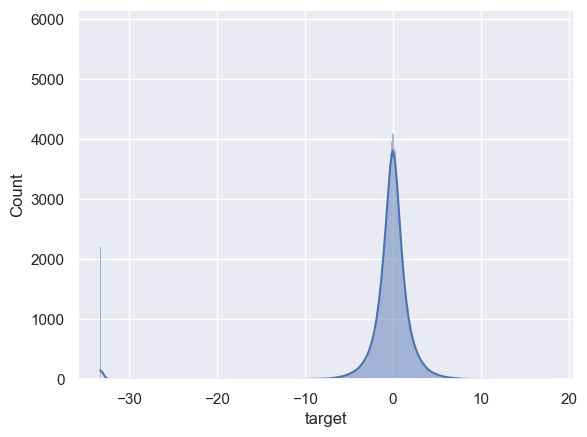

In [20]:
sns.set()
sns.histplot(train['target'], kde=True)

能够发现，大部分用户忠诚度评分都集中在[-10,10]之间，并且基本符合正态分布，唯一需要注意的是有个别异常值取值在-30以下，该数据在后续分析中需要额外注意。我们可以简单查看有多少用户的标签数值是小于30的：

In [35]:
(train['target'] < -30).sum()

2207

约占整体20万数据的1%。

&emsp;&emsp;当然，对于连续变量，一般可以采用$3\delta$原则进行异常值识别，此处我们也可以简单计算下异常值范围：

In [36]:
statistics.loc['mean'] - 3 * statistics.loc['std']

-11.945136285536142

即取值大于或小于11.94即可视作异常。

- 异常值分析

&emsp;&emsp;需要注意的是，此处我们是围绕标签进行的异常值检测，而本案例中标签并不是自然数值测量或统计的结果（如消费金额、身高体重等），而是通过某种公式人工计算得出（详见赛题分析）。出现如此离群点极有可能是某类特殊用户的标记。因此不宜进行异常值处理，而应该将其单独视作特殊的一类，在后续建模分析时候单独对此类用户进行特征提取与建模分析。

### 4.规律一致性分析

&emsp;&emsp;接下来，进行训练集和测试集的规律一致性分析。        
&emsp;&emsp;所谓规律一致性，指的是需要对训练集和测试集特征数据的分布进行简单比对，以“确定”两组数据是否诞生于同一个总体，即两组数据是否都遵循着背后总体的规律，即两组数据是否存在着规律一致性。      
&emsp;&emsp;我们知道，尽管机器学习并不强调样本-总体的概念，但在训练集上挖掘到的规律要在测试集上起到预测效果，就必须要求这两部分数据受到相同规律的影响。一般来说，对于标签未知的测试集，我们可以通过特征的分布规律来判断两组数据是否取自同一总体。

- 单变量分析

&emsp;&emsp;首先我们先进行简单的单变量分布规律的对比。由于数据集中四个变量都是离散型变量，因此其分布规律我们可以通过相对占比分布（某种意义上来说也就是概率分布）来进行比较。        
&emsp;&emsp;例如首先我们查看首次激活月份的相对占比分布可以通过如下代码实现：

In [37]:
# 特征列名
features = ['first_active_month','feature_1','feature_2','feature_3']

# 训练集/测试集样本总数
train_count = train.shape[0]
test_count = test.shape[0]

In [38]:
# 不同取值水平汇总后排序再除以样本总数
train['first_active_month'].value_counts().sort_index()/train_count

first_active_month
2011-11    0.000040
2011-12    0.000010
2012-02    0.000035
2012-03    0.000050
2012-04    0.000089
             ...   
2017-10    0.067825
2017-11    0.064036
2017-12    0.050367
2018-01    0.000168
2018-02    0.000005
Name: count, Length: 75, dtype: float64

<Axes: xlabel='first_active_month'>

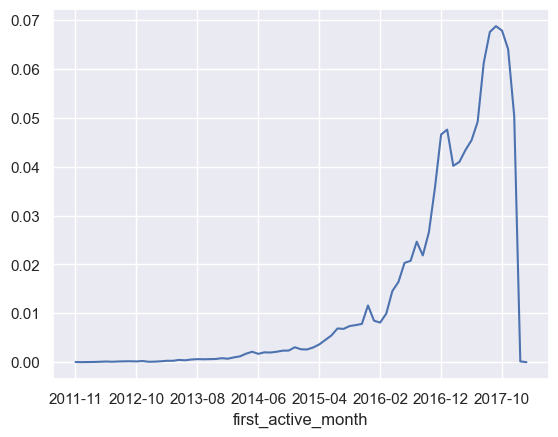

In [39]:
# 分布图如下所示：
(train['first_active_month'].value_counts().sort_index()/train_count).plot()

当然，我们需要同时对比训练集和测试集的四个特征:

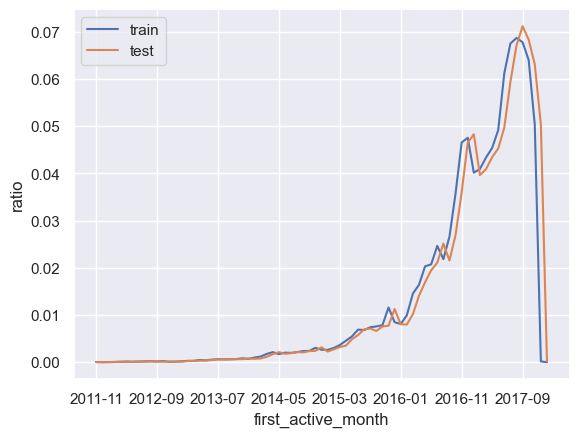

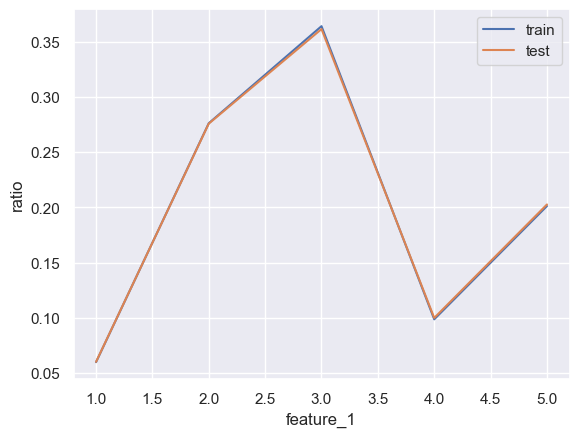

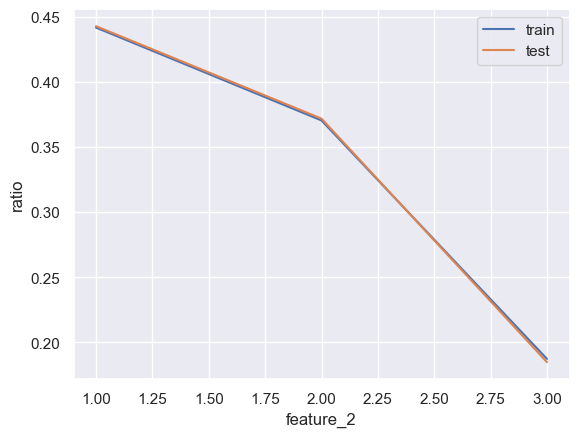

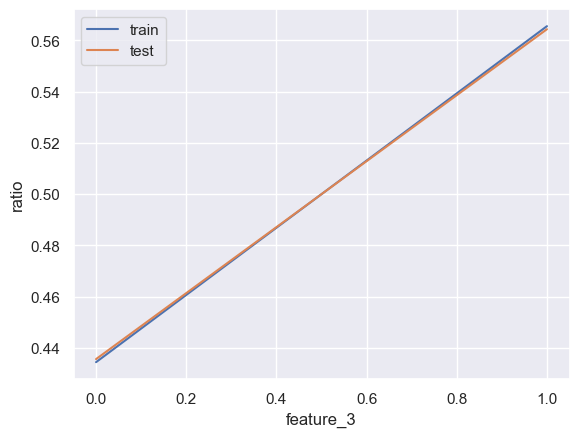

In [26]:
for feature in features:
    (train[feature].value_counts().sort_index()/train_count).plot()
    (test[feature].value_counts().sort_index()/test_count).plot()
    plt.legend(['train','test'])
    plt.xlabel(feature)
    plt.ylabel('ratio')
    plt.show()

能够发现，两组数据的单变量分布基本一致。

- 多变量联合分布

&emsp;&emsp;接下来，我们进一步查看联合变量分布。所谓联合概率分布，指的是将离散变量两两组合，然后查看这个新变量的相对占比分布。例如特征1有0/1两个取值水平，特征2有A/B两个取值水平，则联合分布中就将存在0A、0B、1A、1B四种不同取值水平，然后进一步查看这四种不同取值水平出现的分布情况。        
&emsp;&emsp;首先我们可以创建如下函数以实现两个变量“联合”的目的：

In [27]:
def combine_feature(df):
    cols = df.columns
    feature1 = df[cols[0]].astype(str).values.tolist()
    feature2 = df[cols[1]].astype(str).values.tolist()
    return pd.Series([feature1[i]+'&'+feature2[i] for i in range(df.shape[0])])

简单测试函数效果：

In [28]:
# 选取两个特征
cols = [features[0], features[1]]
cols

['first_active_month', 'feature_1']

In [29]:
# 查看合并后结果
train_com = combine_feature(train[cols])
train_com

0         2017-06&5
1         2017-01&4
2         2016-08&2
3         2017-09&4
4         2017-11&1
            ...    
201912    2017-09&3
201913    2015-10&3
201914    2017-08&4
201915    2016-07&3
201916    2017-07&3
Length: 201917, dtype: object

进一步计算占比分布：

In [30]:
train_dis = train_com.value_counts().sort_index()/train_count
train_dis

2011-11&3    0.000040
2011-12&3    0.000010
2012-02&3    0.000035
2012-03&3    0.000050
2012-04&3    0.000089
               ...   
2018-01&2    0.000054
2018-01&3    0.000020
2018-01&4    0.000045
2018-01&5    0.000015
2018-02&1    0.000005
Name: count, Length: 239, dtype: float64

当然，也可以对测试集进行相同操作：

In [31]:
test_dis = combine_feature(test[cols]).value_counts().sort_index()/test_count
test_dis

2011-11&3    0.000024
2011-12&3    0.000016
2012-01&3    0.000008
2012-02&3    0.000032
2012-03&3    0.000081
               ...   
2018-01&2    0.000089
2018-01&3    0.000016
2018-01&4    0.000040
2018-01&5    0.000024
nan&5        0.000008
Name: count, Length: 239, dtype: float64

然后对比二者分布：

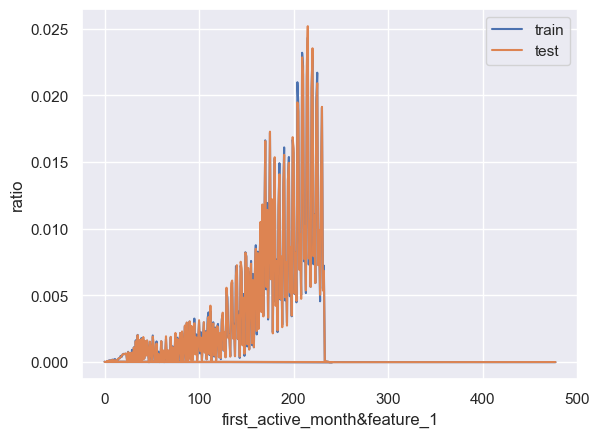

In [32]:
# 创建新的index
index_dis = pd.Series(train_dis.index.tolist() + test_dis.index.tolist()).drop_duplicates().sort_values()

# 对缺失值填补为0
(index_dis.map(train_dis).fillna(0)).plot()
(index_dis.map(test_dis).fillna(0)).plot()

# 绘图
plt.legend(['train','test'])
plt.xlabel('&'.join(cols))
plt.ylabel('ratio')
plt.show()

能够发现其分布基本一致。当然我们可以通过如下代码快速致性所有两两变量联合分布的比较：

['first_active_month', 'feature_1']


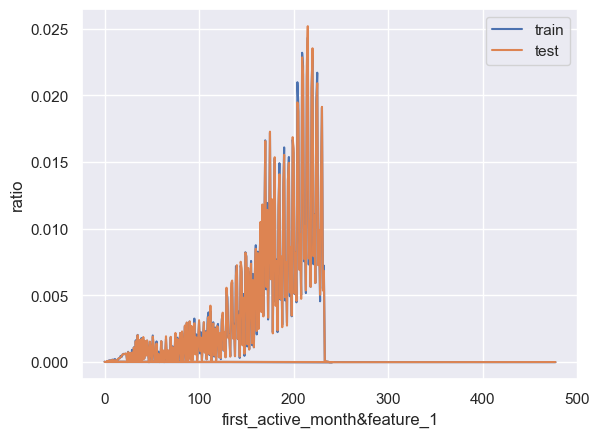

['first_active_month', 'feature_2']


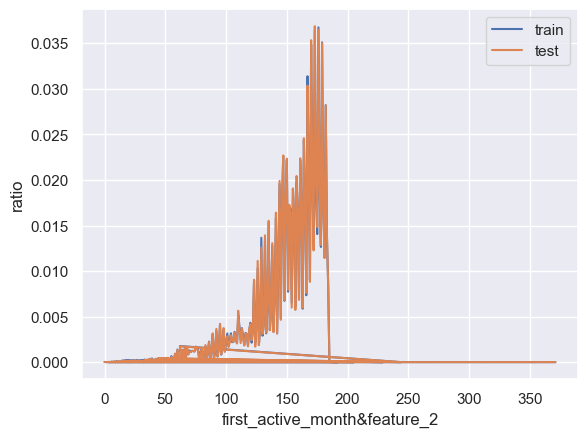

['first_active_month', 'feature_3']


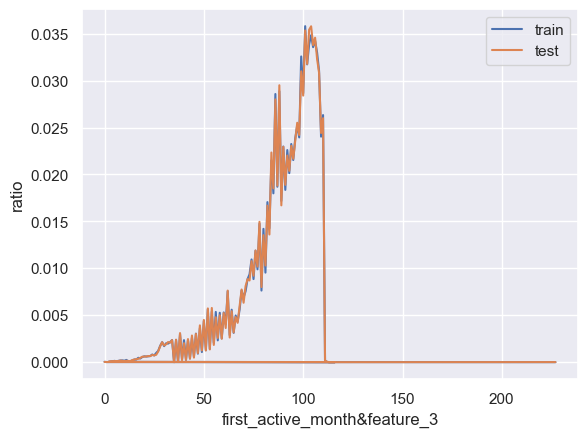

['feature_1', 'feature_2']


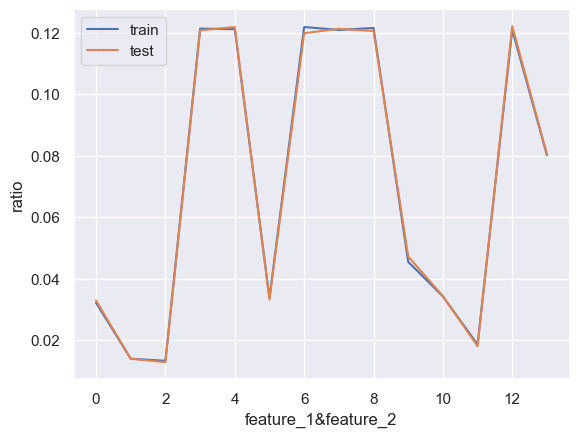

['feature_1', 'feature_3']


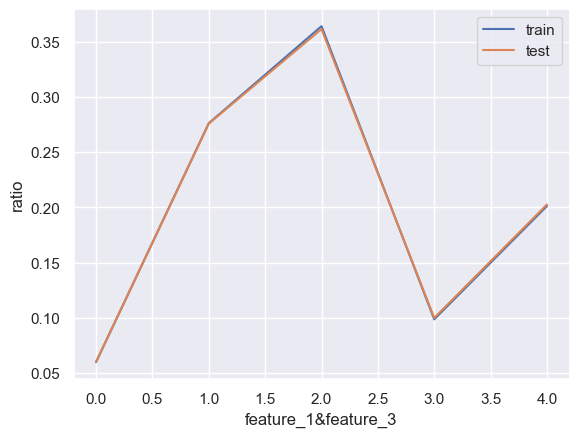

['feature_2', 'feature_3']


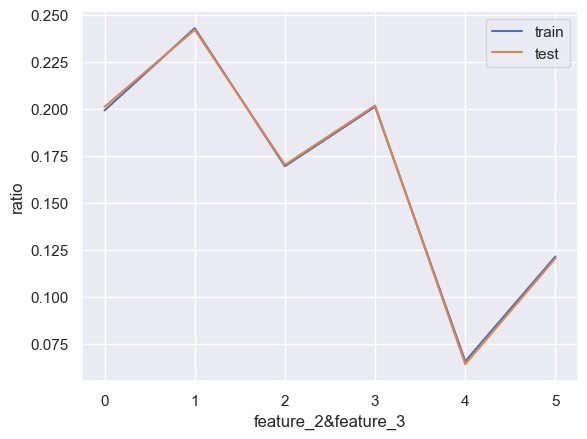

In [33]:
n = len(features)
for i in range(n-1):
    for j in range(i+1, n):
        cols = [features[i], features[j]]
        print(cols)
        train_dis = combine_feature(train[cols]).value_counts().sort_index()/train_count
        test_dis = combine_feature(test[cols]).value_counts().sort_index()/test_count
        index_dis = pd.Series(train_dis.index.tolist() + test_dis.index.tolist()).drop_duplicates().sort_values()
        (index_dis.map(train_dis).fillna(0)).plot()
        (index_dis.map(test_dis).fillna(0)).plot()
        plt.legend(['train','test'])
        plt.xlabel('&'.join(cols))
        plt.ylabel('ratio')
        plt.show()

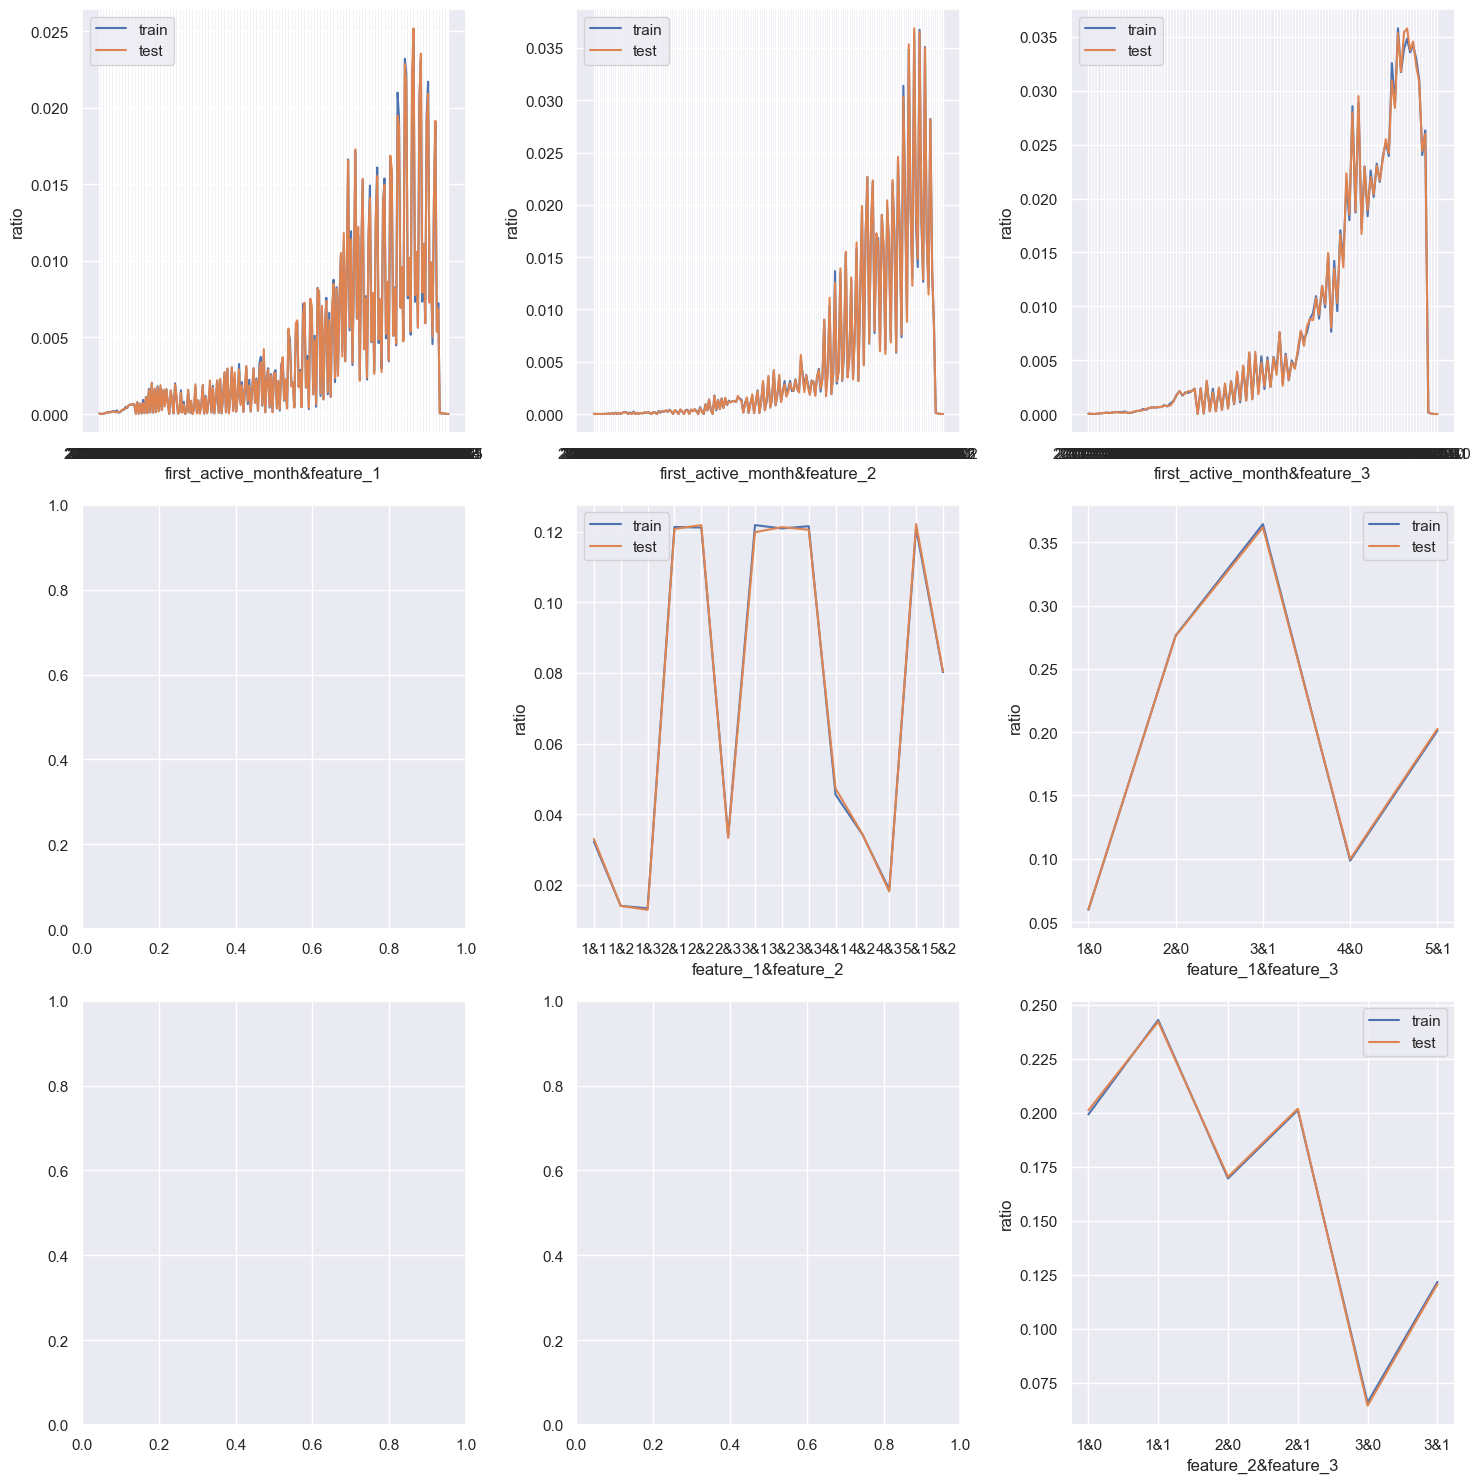

In [34]:
import matplotlib.pyplot as plt

# 创建一个大的图形区域，包含多个子图
fig, axs = plt.subplots(nrows=n-1, ncols=n-1, figsize=(15, 15))

for i in range(n-1):
    for j in range(i+1, n):
        cols = [features[i], features[j]]

        # 在指定的子图中绘制图形
        ax = axs[i][j-1]

        train_dis = combine_feature(train[cols]).value_counts().sort_index()/train_count
        test_dis = combine_feature(test[cols]).value_counts().sort_index()/test_count
        index_dis = pd.Series(train_dis.index.tolist() + test_dis.index.tolist()).drop_duplicates().sort_values()
        
        ax.plot(index_dis, index_dis.map(train_dis).fillna(0), label='train')
        ax.plot(index_dis, index_dis.map(test_dis).fillna(0), label='test')
        ax.legend()
        ax.set_xlabel('&'.join(cols))
        ax.set_ylabel('ratio')

plt.tight_layout() # 用于自动调整子图的布局
plt.show()

能够发现所有联合变量的占比分布基本一致。数据集整体质量较高，且基本可以确认，训练集和测试集取自同一样本总体。

- 规律一致性分析的实际作用

&emsp;&emsp;在实际建模过程中，规律一致性分析是非常重要但又经常容易被忽视的一个环节。通过规律一致性分析，我们可以得出非常多的可用于后续指导后续建模的关键性意见。通常我们可以根据规律一致性分析得出以下基本结论：

&emsp;&emsp;(1).如果分布非常一致，则说明所有特征均取自同一整体，训练集和测试集规律拥有较高一致性，模型效果上限较高，建模过程中应该更加依靠特征工程方法和模型建模技巧提高最终预测效果；

&emsp;&emsp;(2).如果分布不太一致，则说明训练集和测试集规律不太一致，此时模型预测效果上限会受此影响而被限制，并且模型大概率容易过拟合，在实际建模过程中可以多考虑使用交叉验证等方式防止过拟合，并且需要注重除了通用特征工程和建模方法外的trick的使用；

&emsp;&emsp;至此，我们就完成了核心数据集的数据探索，接下来，我们还将围绕其他的补充数据进行进一步的数据解读与数据清洗，并为最终的建模工作做好相关准备。